# Student Grade Regression - Portuguese

## 1. Import Libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Load and Summarize Data

In [28]:
# Load dataframe (df)
df = pd.read_csv('student-por.csv')
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(649, 32) (649,)


In [29]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [31]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [32]:
# Check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## 3. Visualize Data

#### Age Distribution

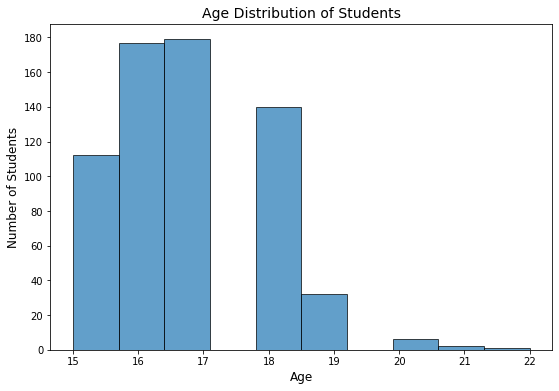

In [33]:
plt.figure(figsize=(9, 6))
plt.yticks(np.arange(0, 200, 20))
age_dist = df['age']
plt.hist(x=age_dist, alpha=0.7, edgecolor='black')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Age Distribution of Students', fontsize=14)
plt.show()

#### Gender Distribution

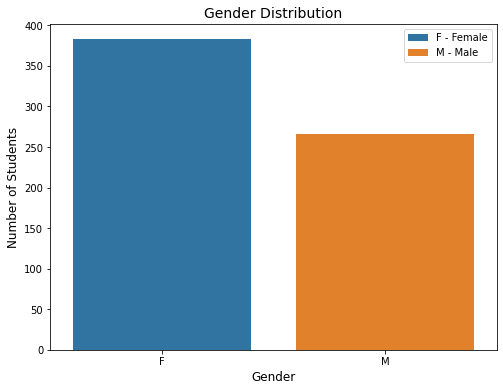

In [34]:
plt.figure(figsize=(8, 6))
gender_labels = ['F - Female', 'M - Male']
gender_dist = df['sex']
gender_plot = sns.countplot(x=df['sex'], hue=df['sex'], dodge=False)
plt.yticks(np.arange(0, 425, 50))
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Gender Distribution', fontsize=14)
plt.legend(labels=gender_labels, loc='upper right')
plt.show()

#### Extracurricular Activities

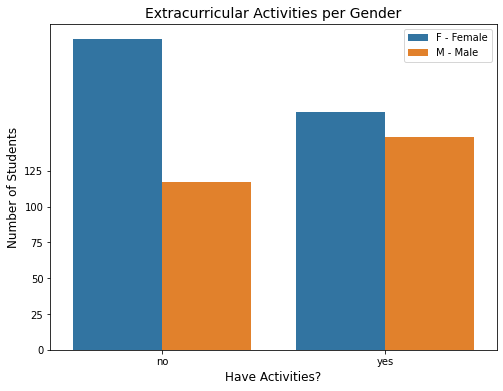

In [35]:
plt.figure(figsize=(8, 6))
activities_labels = ['No', 'Yes']
sns.countplot(x=df['activities'], hue=df['sex'], dodge=True)
plt.yticks(np.arange(0, 150, 25))
plt.xlabel('Have Activities?', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Extracurricular Activities per Gender', fontsize=14)
plt.legend(labels=gender_labels, loc='upper right')
plt.show()

#### Travel Time from Home to School

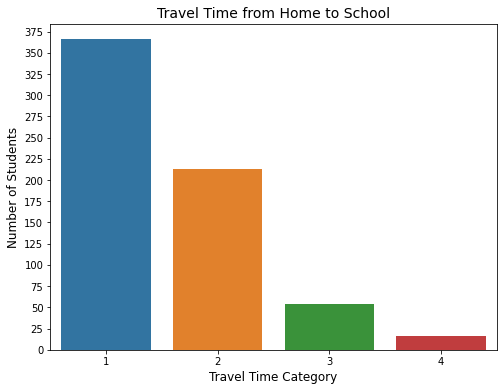

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['traveltime'])
plt.yticks(np.arange(0, 400, 25))
plt.xlabel('Travel Time Category', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Travel Time from Home to School', fontsize=14)
plt.show()

###### **Travel Time Category:**
1 = <15 minutes, 2 = 15-30 minutes, 3 = 30 minutes - 1 hour, 4 = >1 hour

#### Weekly Studying Time 

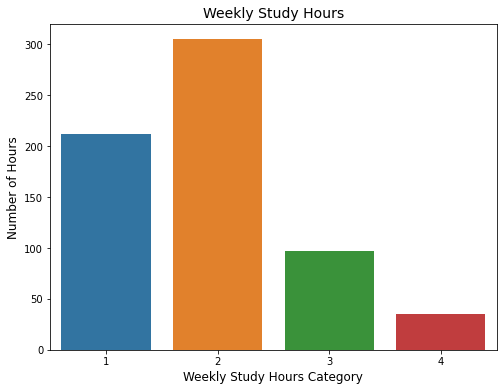

In [37]:
plt.figure(figsize=(8, 6))
study_labels = ['1 - <2 hours', '2 - 2-5 hours', '3 - 5-10 hours', '4 - >10 hours']
sns.countplot(x=df['studytime'], dodge=True)
plt.yticks(np.arange(0, 350, 50))
plt.xlabel('Weekly Study Hours Category', fontsize=12)
plt.ylabel('Number of Hours', fontsize=12)
plt.title('Weekly Study Hours', fontsize=14)
plt.show()

#### Number of Absences per Age

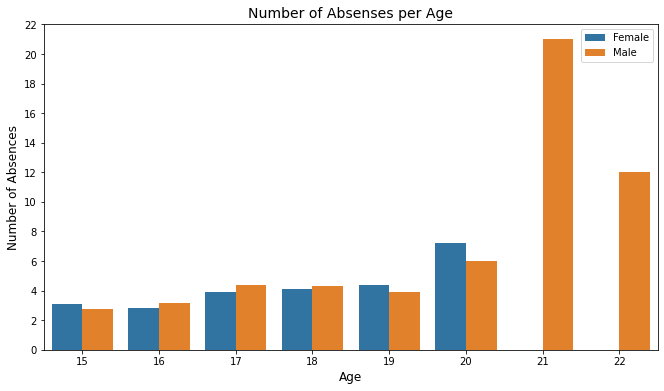

In [38]:
gender_labels_2 = ['Female', 'Male']
plt.figure(figsize=(11, 6))
sns.barplot(x=df['age'], y=df['absences'], hue=df['sex'], ci=None)
plt.yticks(np.arange(0, 24, 2))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Number of Absenses per Age', fontsize=14)
plt.legend(labels=gender_labels_2, loc='upper right')
plt.show()

#### Number of Failures per Age

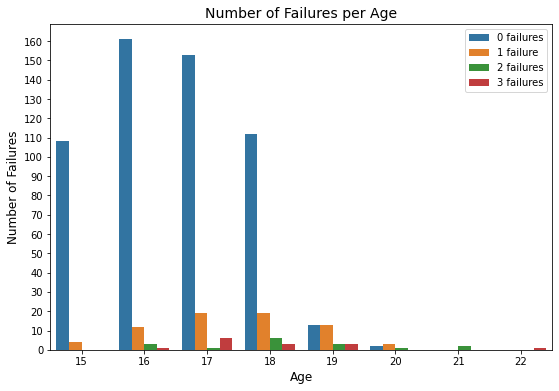

In [39]:
# Number of failure rates per age
plt.figure(figsize=(9, 6))
failure_labels = ['0 failures', '1 failure', '2 failures', '3 failures']
sns.countplot(x=df['age'], hue=df['failures'])
plt.yticks(np.arange(0, 170, 10))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Failures', fontsize=12)
plt.title('Number of Failures per Age', fontsize=14)
plt.legend(labels=failure_labels, loc='upper right')
plt.show()

#### Grades Distribution

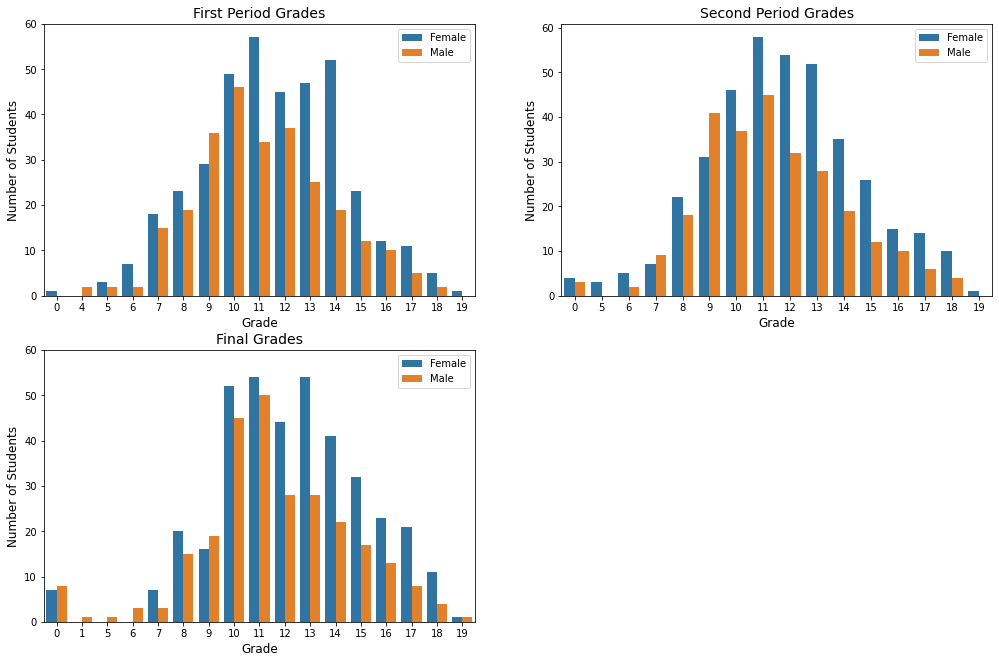

In [40]:
# First period grades
fig1 = plt.figure(figsize=(17, 11))
ax1 = fig1.add_subplot(2, 2, 1)
ax1 = sns.countplot(x=df['G1'], hue=df['sex'])
plt.yticks(np.arange(0, 70, 10))
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('First Period Grades', fontsize=14)
plt.legend(labels=gender_labels_2, loc='upper right')

# Second period grades
ax2 = fig1.add_subplot(2, 2, 2)
ax2 = sns.countplot(x=df['G2'], hue=df['sex'])
plt.yticks(np.arange(0, 70, 10))
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Second Period Grades', fontsize=14)
plt.legend(labels=gender_labels_2, loc='upper right')

# Final grades
ax3 = fig1.add_subplot(2, 2, 3)
ax3 = sns.countplot(x=df['G3'], hue=df['sex'])
plt.yticks(np.arange(0, 70, 10))
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Final Grades', fontsize=14)
plt.legend(labels=gender_labels_2, loc='upper right')

plt.show()

#### Pairwise Relationships Between Features

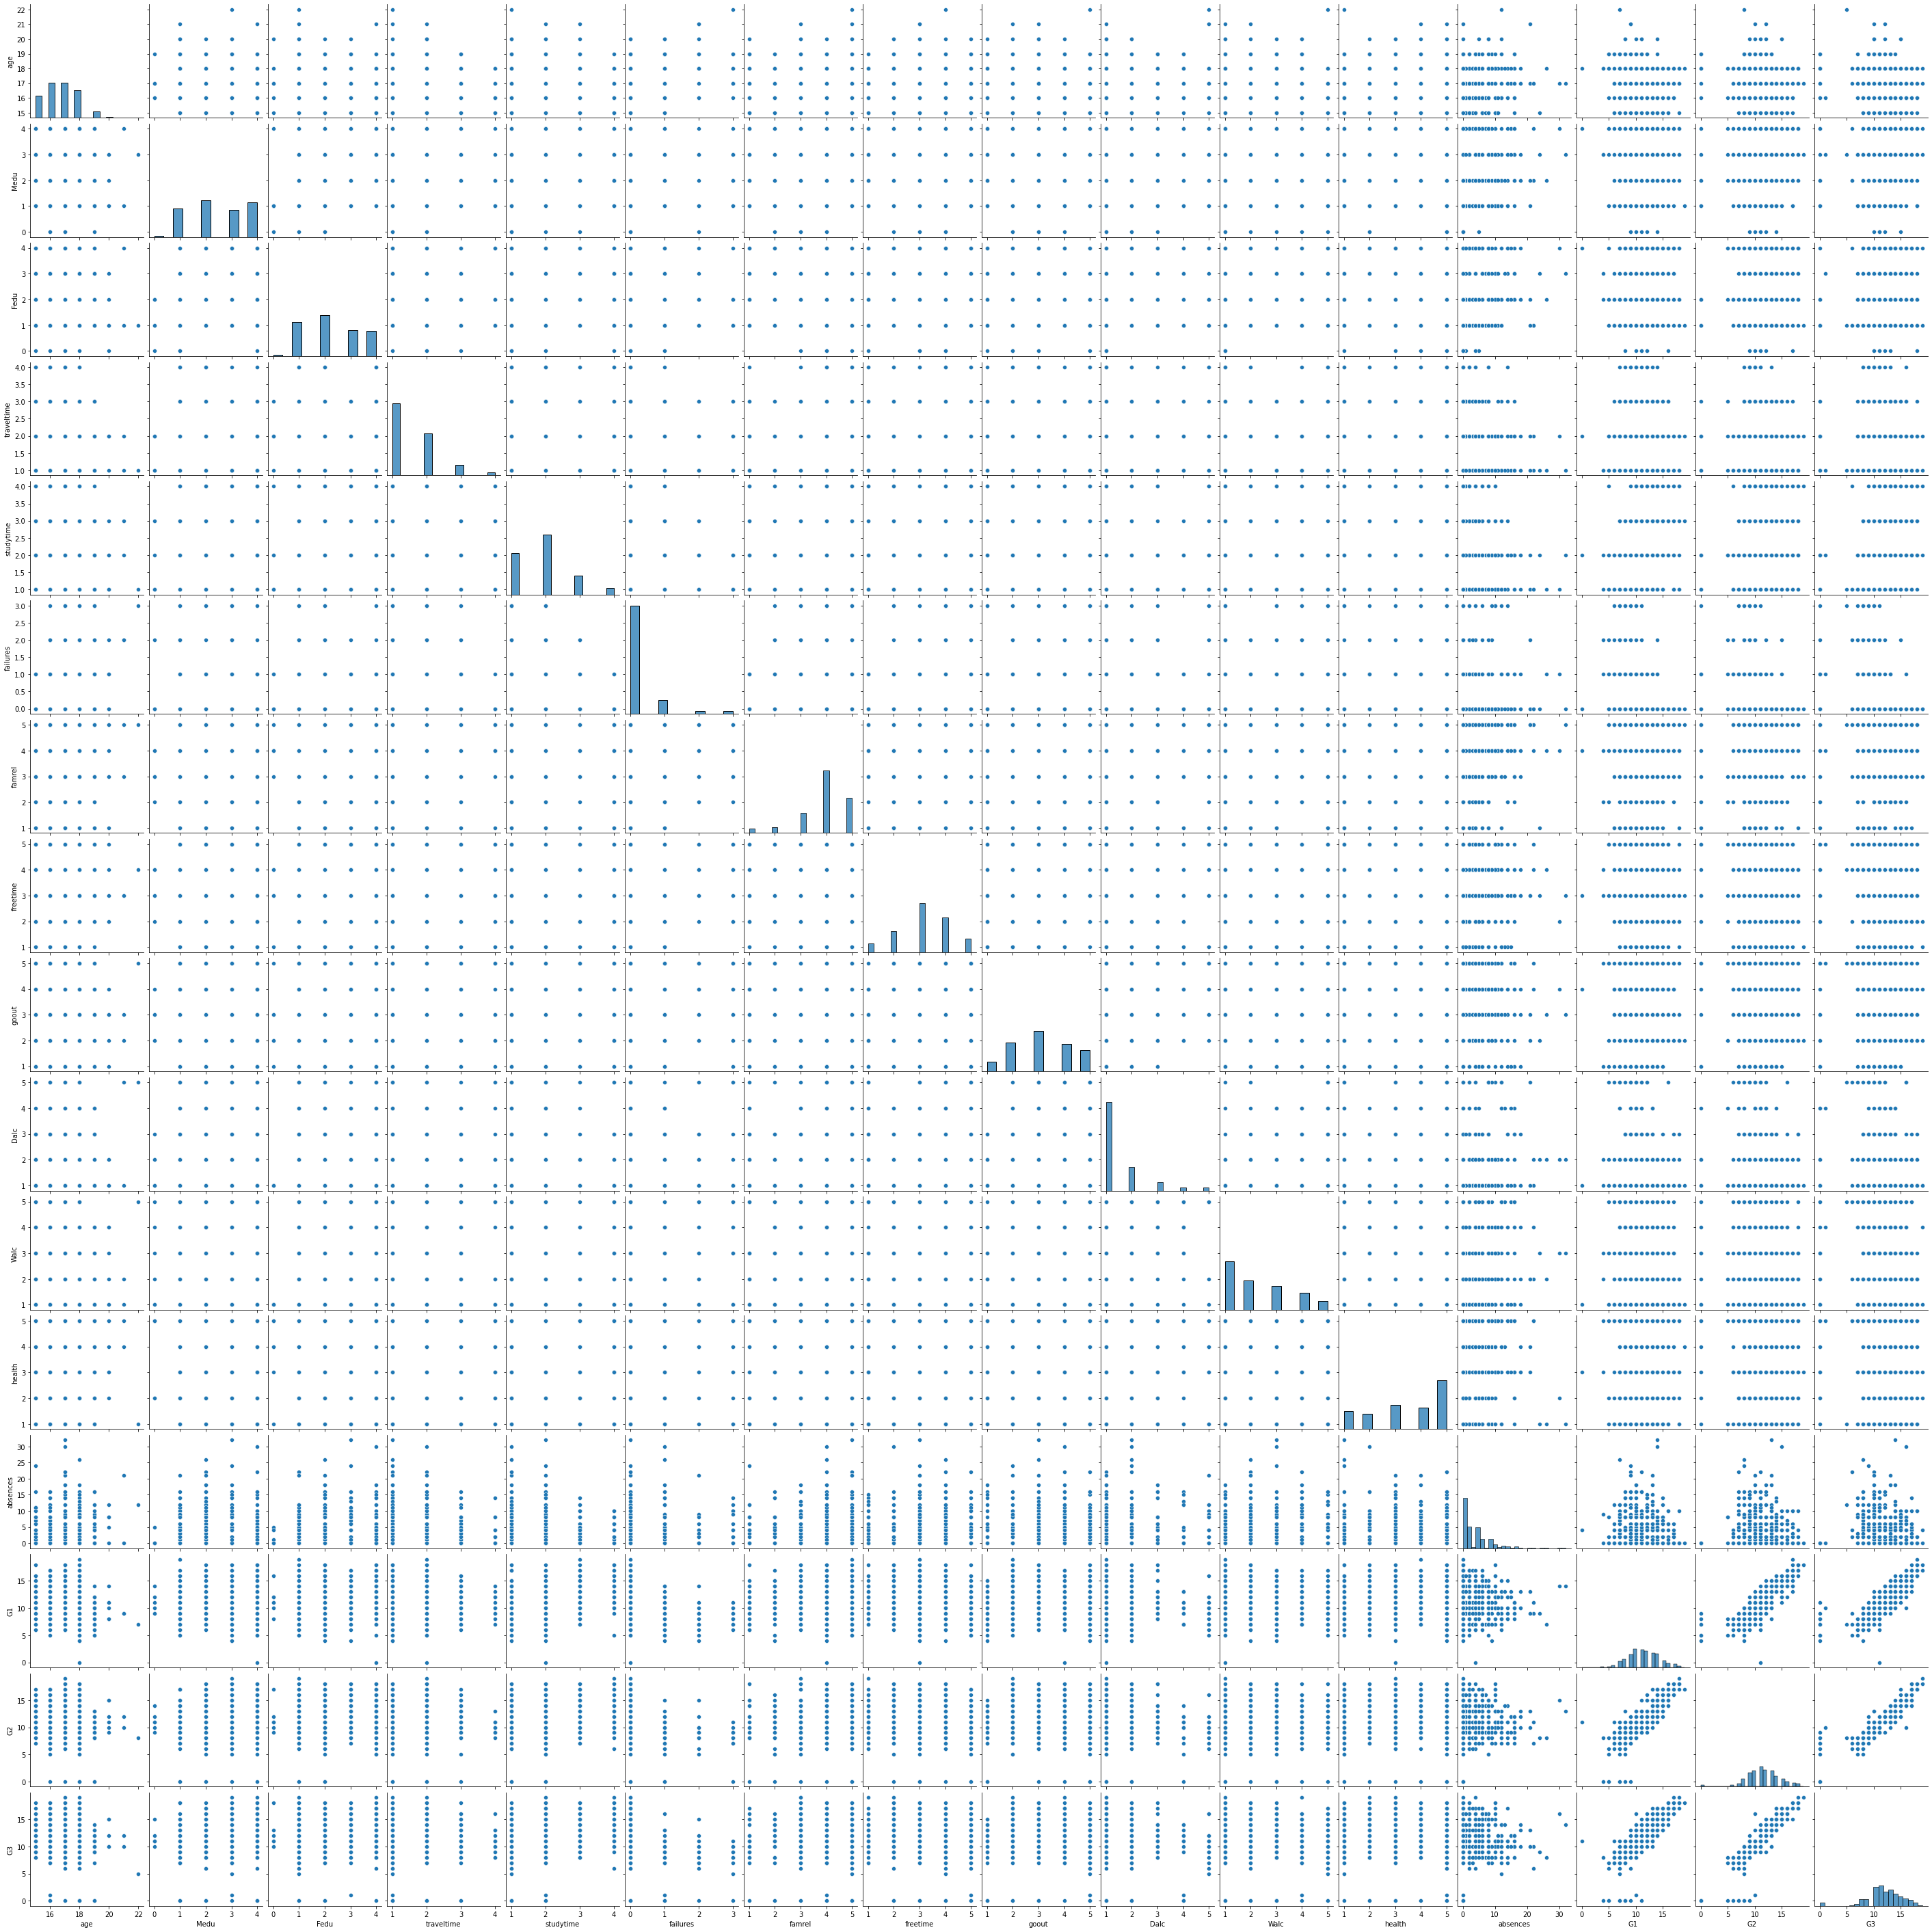

In [41]:
sns.pairplot(df)

#### Correlation Map

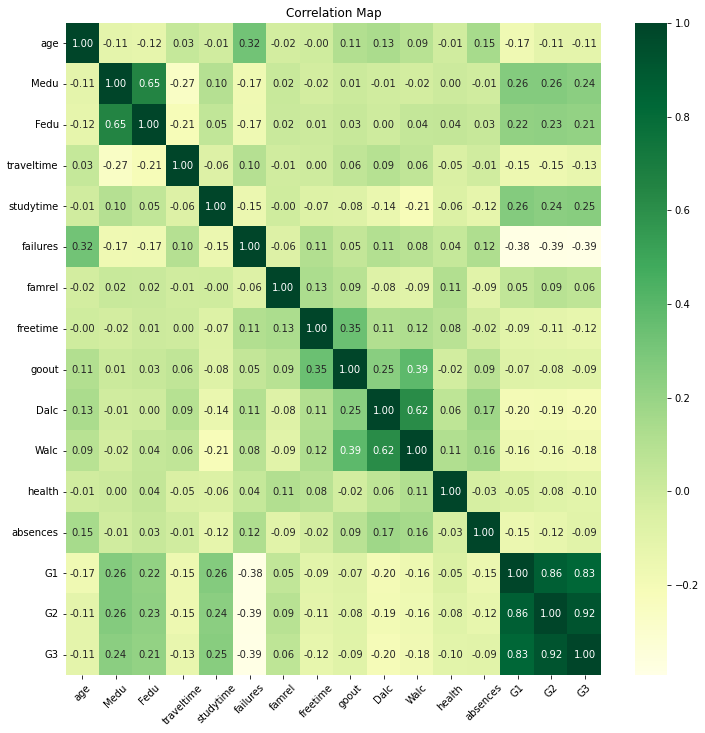

In [42]:
# Correlation Map
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='YlGn', annot=True, fmt = ".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## 4. Data Preprocessing and Feature Engineering

In [43]:
# Categorical Columns (indices) - 0:1, 3:5, 8:11, 15:22
from sklearn.preprocessing import LabelEncoder

# Label Encode - 0:1, 3:5, 15:22
le = LabelEncoder()
# le_columns = X[:, [0, 1, 3, 4, 5, 15, 16, 17, 18, 19, 20, 21, 22]]

# for i in X[:]:
#   if i in le_columns:
#     X[:, i] = le.fit_transform(X[:, i])

# Encode nominal attributes
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 3] = le.fit_transform(X[:, 3])
X[:, 4] = le.fit_transform(X[:, 4])
X[:, 5] = le.fit_transform(X[:, 5])
X[:, 8] = le.fit_transform(X[:, 8])
X[:, 9] = le.fit_transform(X[:, 9])
X[:, 10] = le.fit_transform(X[:, 10])
X[:, 11] = le.fit_transform(X[:, 11])

# Encode binary attributes
X[:, 15] = le.fit_transform(X[:, 15])
X[:, 16] = le.fit_transform(X[:, 16])
X[:, 17] = le.fit_transform(X[:, 17])
X[:, 18] = le.fit_transform(X[:, 18])
X[:, 19] = le.fit_transform(X[:, 19])
X[:, 20] = le.fit_transform(X[:, 20])
X[:, 21] = le.fit_transform(X[:, 21])
X[:, 22] = le.fit_transform(X[:, 22])

print(X)

[[0 0 18 ... 4 0 11]
 [0 0 17 ... 2 9 11]
 [0 0 15 ... 6 12 13]
 ...
 [1 0 18 ... 6 11 12]
 [1 1 17 ... 6 10 10]
 [1 1 18 ... 4 10 11]]


In [44]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [45]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 5. Define and Evalutate Models

In [46]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
# LightGBM
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Additional Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

### Linear Regression (LR)

In [47]:
lr_reg = LinearRegression()

lr_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# Predict test set results
lr_pred = lr_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((lr_pred.reshape(len(lr_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, lr_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, lr_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, lr_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, lr_pred)))

[[ 6.51  8.  ]
 [15.07 15.  ]
 [16.75 16.  ]
 [ 9.84 10.  ]
 [ 8.17 10.  ]
 [11.9  12.  ]
 [13.05 13.  ]
 [18.98 17.  ]
 [11.66 12.  ]
 [10.75 12.  ]
 [10.39 11.  ]
 [ 9.66 10.  ]
 [13.07 13.  ]
 [ 7.54  8.  ]
 [18.53 18.  ]
 [12.03 12.  ]
 [13.17 13.  ]
 [12.14 13.  ]
 [10.4  10.  ]
 [ 9.68 10.  ]
 [11.72 12.  ]
 [ 9.7  10.  ]
 [17.55 17.  ]
 [13.18 15.  ]
 [12.56 14.  ]
 [-0.71  0.  ]
 [12.41 12.  ]
 [13.16 14.  ]
 [10.69 12.  ]
 [12.65  9.  ]
 [13.86 13.  ]
 [16.4  16.  ]
 [13.01 13.  ]
 [16.17 16.  ]
 [12.45 12.  ]
 [ 8.29 10.  ]
 [ 8.72 10.  ]
 [10.99 11.  ]
 [12.83 13.  ]
 [10.75 10.  ]
 [15.47 15.  ]
 [17.86 18.  ]
 [10.91 11.  ]
 [13.45 13.  ]
 [12.   13.  ]
 [ 8.51 10.  ]
 [12.52 14.  ]
 [ 8.3   9.  ]
 [11.02 11.  ]
 [ 8.73 10.  ]
 [ 4.82  8.  ]
 [14.14 17.  ]
 [ 8.67  9.  ]
 [11.85 13.  ]
 [ 6.18  8.  ]
 [11.16 11.  ]
 [11.4  12.  ]
 [11.1  12.  ]
 [14.43 15.  ]
 [14.51 15.  ]
 [13.56 13.  ]
 [ 6.24  7.  ]
 [11.31 12.  ]
 [ 8.31 10.  ]
 [13.34 12.  ]
 [12.13 12.  ]
 [11.54 11

<table border = "1">
  <thead>
    <th colspan = "5">Linear Regression Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.866</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.290</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.136</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.818</td>
    </tr>
  </tbody>
</table>

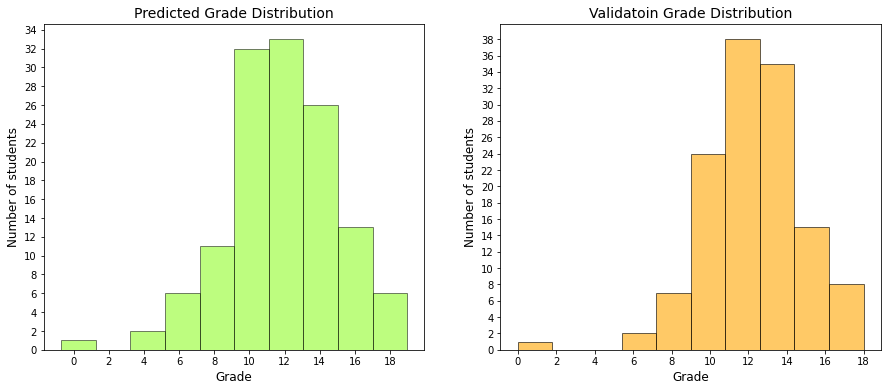

In [49]:
# Plot histogram for lr_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 40, 2))
plt.yticks(np.arange(0, 420, 2))
plt.hist(x=lr_pred, facecolor='lawngreen', alpha=0.5, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Predicted Grade Distribution', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 40, 2))
plt.yticks(np.arange(0, 40, 2))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Validatoin Grade Distribution', fontsize=14)

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 1 --

R^2 Scoring:
Mean: 0.826177
Std: +/- 0.030063
Min: 0.770537
Max: 0.867234

RMSE Scoring:
Mean: 1.392709
Std: +/- 0.123960
Min: 1.210498
Max: 1.619627


-- Fold: 2 --

R^2 Scoring:
Mean: 0.823983
Std: +/- 0.031289
Min: 0.768562
Max: 0.872144

RMSE Scoring:
Mean: 1.400071
Std: +/- 0.119009
Min: 1.209492
Max: 1.588755



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 3 --

R^2 Scoring:
Mean: 0.826043
Std: +/- 0.046287
Min: 0.734559
Max: 0.881189

RMSE Scoring:
Mean: 1.385218
Std: +/- 0.187763
Min: 1.117102
Max: 1.719244


-- Fold: 4 --

R^2 Scoring:
Mean: 0.829279
Std: +/- 0.034655
Min: 0.775353
Max: 0.887788

RMSE Scoring:
Mean: 1.377938
Std: +/- 0.153307
Min: 1.113353
Max: 1.625289



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 5 --

R^2 Scoring:
Mean: 0.831000
Std: +/- 0.061069
Min: 0.716445
Max: 0.941974

RMSE Scoring:
Mean: 1.354857
Std: +/- 0.266837
Min: 0.789646
Max: 1.809290


-- Fold: 6 --

R^2 Scoring:
Mean: 0.830868
Std: +/- 0.065597
Min: 0.640139
Max: 0.946243

RMSE Scoring:
Mean: 1.352172
Std: +/- 0.277290
Min: 0.774975
Max: 2.077618



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 7 --

R^2 Scoring:
Mean: 0.833451
Std: +/- 0.062356
Min: 0.707300
Max: 0.950652

RMSE Scoring:
Mean: 1.341637
Std: +/- 0.299386
Min: 0.748839
Max: 1.918976


-- Fold: 8 --

R^2 Scoring:
Mean: 0.833542
Std: +/- 0.064722
Min: 0.702054
Max: 0.947419

RMSE Scoring:
Mean: 1.340389
Std: +/- 0.301980
Min: 0.801793
Max: 2.001802



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 9 --

R^2 Scoring:
Mean: 0.838431
Std: +/- 0.066380
Min: 0.688968
Max: 0.945377

RMSE Scoring:
Mean: 1.321746
Std: +/- 0.355901
Min: 0.710123
Max: 2.164442



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)



-- Fold: 10 --

R^2 Scoring:
Mean: 0.833946
Std: +/- 0.066055
Min: 0.720327
Max: 0.949906

RMSE Scoring:
Mean: 1.334244
Std: +/- 0.301829
Min: 0.732412
Max: 1.843822



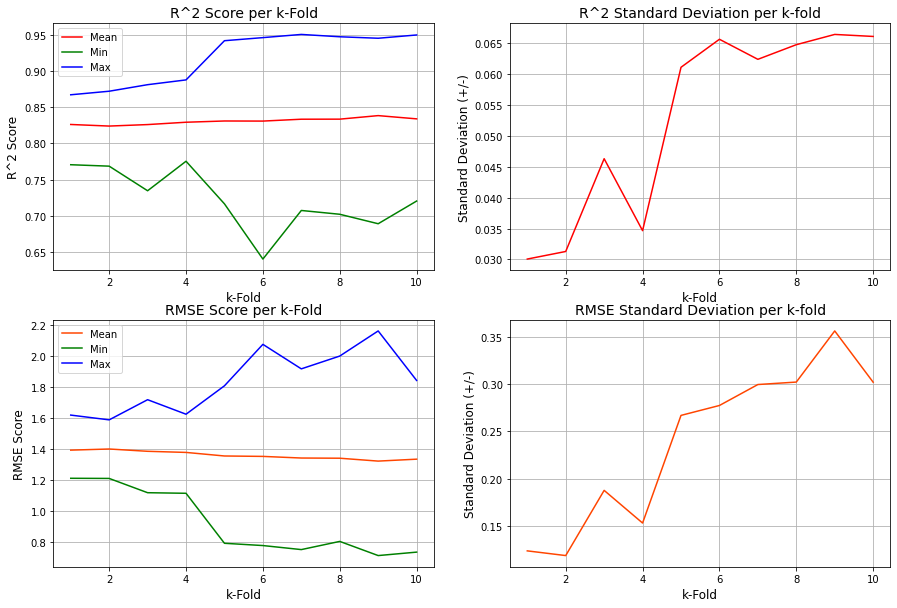

In [50]:
# Apply k-Fold Cross Validation on the training set

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedStratifiedKFold(n_splits = k, n_repeats = 3, random_state = 0)
  r2_scores = cross_val_score(lr_reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(lr_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(lr_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">Linear Regression Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.834</td>
      <td>1.334</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.066</td>
      <td>0.302</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.720</td>
      <td>0.732</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.950</td>
      <td>1.844</td>
    </tr>
  </tbody>
</table>

### Decision Tree (DT)

In [52]:
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=9,
                               min_samples_split=20, random_state=0)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [72]:
# Predict test set results
y_pred = dt_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, y_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, y_pred)))

[[ 7.45  8.  ]
 [14.66 15.  ]
 [15.79 16.  ]
 [10.32 10.  ]
 [ 9.55 10.  ]
 [12.57 12.  ]
 [12.57 13.  ]
 [18.   17.  ]
 [12.57 12.  ]
 [11.12 12.  ]
 [10.32 11.  ]
 [10.32 10.  ]
 [13.37 13.  ]
 [ 8.    8.  ]
 [18.   18.  ]
 [12.57 12.  ]
 [12.57 13.  ]
 [13.22 13.  ]
 [10.32 10.  ]
 [10.32 10.  ]
 [12.57 12.  ]
 [10.32 10.  ]
 [17.35 17.  ]
 [13.37 15.  ]
 [12.57 14.  ]
 [ 1.64  0.  ]
 [12.57 12.  ]
 [13.37 14.  ]
 [11.12 12.  ]
 [13.22  9.  ]
 [13.37 13.  ]
 [15.79 16.  ]
 [13.37 13.  ]
 [15.79 16.  ]
 [12.57 12.  ]
 [ 9.55 10.  ]
 [ 9.55 10.  ]
 [11.12 11.  ]
 [12.57 13.  ]
 [11.12 10.  ]
 [15.79 15.  ]
 [17.35 18.  ]
 [11.12 11.  ]
 [13.37 13.  ]
 [12.57 13.  ]
 [ 9.55 10.  ]
 [12.57 14.  ]
 [ 9.55  9.  ]
 [11.12 11.  ]
 [ 9.55 10.  ]
 [ 7.45  8.  ]
 [14.66 17.  ]
 [ 9.55  9.  ]
 [12.57 13.  ]
 [ 7.45  8.  ]
 [11.12 11.  ]
 [11.12 12.  ]
 [11.12 12.  ]
 [14.66 15.  ]
 [14.66 15.  ]
 [13.37 13.  ]
 [ 8.    7.  ]
 [11.12 12.  ]
 [ 9.55 10.  ]
 [13.37 12.  ]
 [12.57 12.  ]
 [11.12 11

<table border = "1">
  <thead>
    <th colspan = "2">Decision Tree Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.744</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.183</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.088</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.833</td>
    </tr>
  </tbody>
</table>

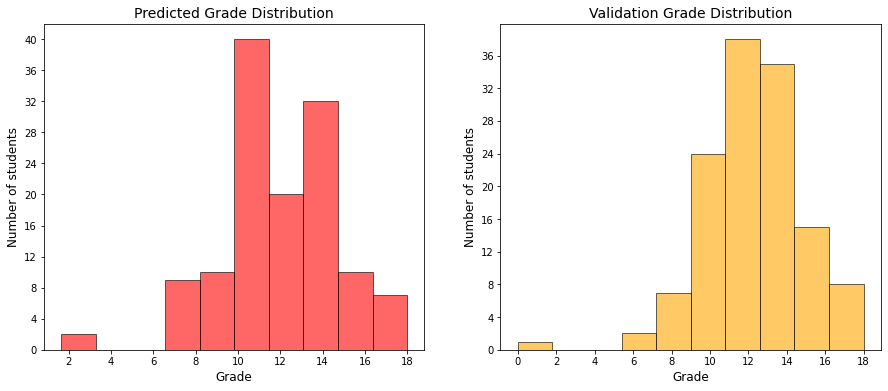

In [54]:
# Plot histogram for y_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 42, 4))
plt.hist(x=y_pred, facecolor='red', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Predicted Grade Distribution', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 40, 4))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Validation Grade Distribution', fontsize=14)

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 1 --

R^2 Scoring:
Mean: 0.803564
Std: +/- 0.023586
Min: 0.771117
Max: 0.839208

RMSE Scoring:
Mean: 1.483330
Std: +/- 0.098741
Min: 1.332153
Max: 1.617578


-- Fold: 2 --

R^2 Scoring:
Mean: 0.803139
Std: +/- 0.021729
Min: 0.762300
Max: 0.835407

RMSE Scoring:
Mean: 1.484387
Std: +/- 0.073841
Min: 1.372297
Max: 1.610106



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 3 --

R^2 Scoring:
Mean: 0.800231
Std: +/- 0.054541
Min: 0.706607
Max: 0.883661

RMSE Scoring:
Mean: 1.482262
Std: +/- 0.206007
Min: 1.167027
Max: 1.838735


-- Fold: 4 --

R^2 Scoring:
Mean: 0.801439
Std: +/- 0.067368
Min: 0.677962
Max: 0.922825

RMSE Scoring:
Mean: 1.471239
Std: +/- 0.267366
Min: 0.934782
Max: 1.887785



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 5 --

R^2 Scoring:
Mean: 0.804010
Std: +/- 0.080644
Min: 0.619018
Max: 0.893184

RMSE Scoring:
Mean: 1.456958
Std: +/- 0.305539
Min: 1.114953
Max: 2.097210


-- Fold: 6 --

R^2 Scoring:
Mean: 0.816556
Std: +/- 0.077661
Min: 0.632476
Max: 0.924941

RMSE Scoring:
Mean: 1.403737
Std: +/- 0.307959
Min: 0.915739
Max: 1.975591



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 7 --

R^2 Scoring:
Mean: 0.830918
Std: +/- 0.077318
Min: 0.581817
Max: 0.946325

RMSE Scoring:
Mean: 1.342278
Std: +/- 0.344992
Min: 0.804092
Max: 2.324993


-- Fold: 8 --

R^2 Scoring:
Mean: 0.827052
Std: +/- 0.086490
Min: 0.618966
Max: 0.939037

RMSE Scoring:
Mean: 1.352668
Std: +/- 0.378462
Min: 0.777122
Max: 2.185265



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 9 --

R^2 Scoring:
Mean: 0.832124
Std: +/- 0.086397
Min: 0.589549
Max: 0.929158

RMSE Scoring:
Mean: 1.337023
Std: +/- 0.398315
Min: 0.808708
Max: 2.486416



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class


-- Fold: 10 --

R^2 Scoring:
Mean: 0.842260
Std: +/- 0.090819
Min: 0.664683
Max: 0.956773

RMSE Scoring:
Mean: 1.273544
Std: +/- 0.402307
Min: 0.747239
Max: 1.958928



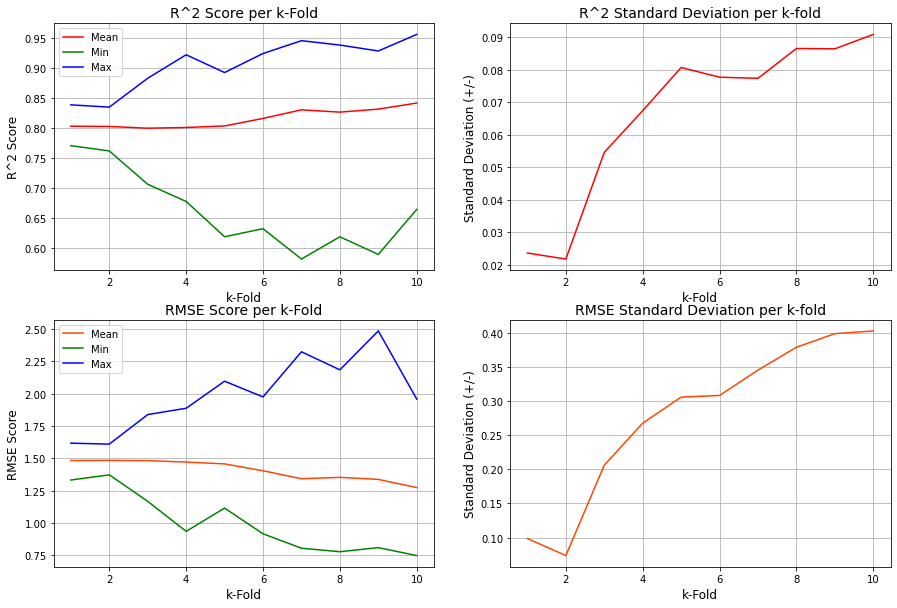

In [55]:
# Apply k-Fold Cross Validation on the training set

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedStratifiedKFold(n_splits = k, n_repeats = 3, random_state = 0)
  r2_scores = cross_val_score(dt_reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(dt_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(dt_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(dt_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))


# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">Decision Tree Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.842</td>
      <td>1.275</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.091</td>
      <td>0.402</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.665</td>
      <td>0.747</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.957</td>
      <td>1.959</td>
    </tr>
  </tbody>
</table>

In [56]:
# Apply Grid Search for parameter tuning

# param_dict = {'n_estimators': [50, 100, 150, 200, 250],
#               'criterion': ['mse', 'mae'],
#               'max_depth': [1, 5, 10, 25, 50, 75, 100],
#               'min_samples_leaf': [2, 5, 10],
#               'min_samples_split': [2, 5, 10],
#               'random_state': [0, 1, 2, 5, 10, 15, 20]}

param_dict = {'criterion': ['mse'],
              'max_depth': [3, 4],
              'min_samples_leaf': [8, 9, 10],
              'min_samples_split': [19, 20, 21],
              'random_state': [0, 1]}

# grid = GridSearchCV(dt_reg, param_dict, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(dt_reg, param_dict, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(dt_reg, param_dict, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
grid = GridSearchCV(dt_reg, param_dict, scoring='r2', cv=cv, n_jobs=-1)
results = grid.fit(X_train, y_train)

# Summarize results
best_score = grid.best_score_
best_parameters = grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)


Best Score: 84.226%
Best Parameters:  {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 20, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">Decision Tree Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>84.226%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'mse'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>4</td>
    </tr>
    <tr>
      <td><b>min_samples_leaf</b></td>
      <td>9</td>
    </tr>
    <tr>
      <td><b>min_samples_split</b></td>
      <td>20</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### Random Forest (RF)

In [57]:
rf_reg = RandomForestRegressor(criterion='mse', max_depth=4, min_samples_split=2,
                            min_samples_leaf=3, n_estimators=53, random_state=2)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=53, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [58]:
# Predict test set results
y_pred = rf_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, y_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, y_pred)))

[[ 7.12  8.  ]
 [14.94 15.  ]
 [15.88 16.  ]
 [10.49 10.  ]
 [ 9.46 10.  ]
 [13.09 12.  ]
 [12.77 13.  ]
 [17.73 17.  ]
 [12.63 12.  ]
 [11.01 12.  ]
 [10.51 11.  ]
 [10.51 10.  ]
 [13.11 13.  ]
 [ 8.53  8.  ]
 [17.73 18.  ]
 [12.87 12.  ]
 [12.7  13.  ]
 [12.9  13.  ]
 [10.51 10.  ]
 [10.49 10.  ]
 [12.78 12.  ]
 [10.41 10.  ]
 [17.49 17.  ]
 [13.13 15.  ]
 [12.79 14.  ]
 [ 1.2   0.  ]
 [12.77 12.  ]
 [13.21 14.  ]
 [11.03 12.  ]
 [12.8   9.  ]
 [13.07 13.  ]
 [15.93 16.  ]
 [13.3  13.  ]
 [15.93 16.  ]
 [12.83 12.  ]
 [ 9.4  10.  ]
 [ 9.53 10.  ]
 [11.03 11.  ]
 [12.79 13.  ]
 [10.75 10.  ]
 [15.56 15.  ]
 [17.55 18.  ]
 [11.03 11.  ]
 [13.46 13.  ]
 [12.78 13.  ]
 [ 9.69 10.  ]
 [12.67 14.  ]
 [ 9.71  9.  ]
 [11.03 11.  ]
 [ 9.29 10.  ]
 [ 6.33  8.  ]
 [15.07 17.  ]
 [ 9.72  9.  ]
 [12.7  13.  ]
 [ 7.58  8.  ]
 [10.75 11.  ]
 [11.03 12.  ]
 [10.99 12.  ]
 [14.37 15.  ]
 [15.01 15.  ]
 [13.57 13.  ]
 [ 7.98  7.  ]
 [10.99 12.  ]
 [ 9.37 10.  ]
 [13.13 12.  ]
 [12.76 12.  ]
 [11.03 11

<table border = "1">
  <thead>
    <th colspan = "2">Random Forest Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.745</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.115</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.056</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.843</td>
    </tr>
  </tbody>
</table>

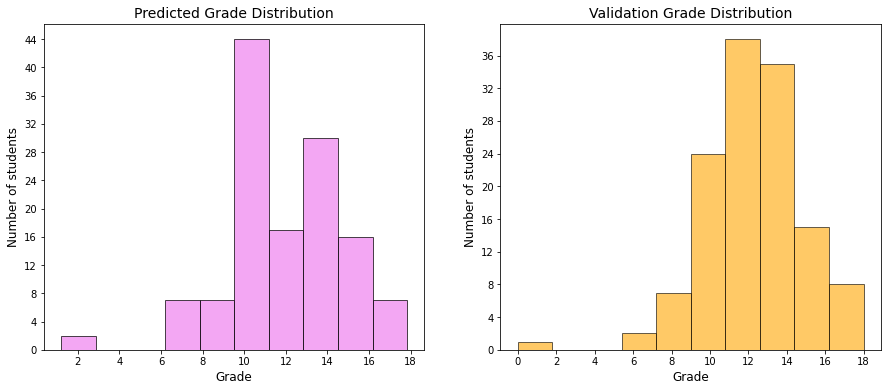

In [59]:
# Plot histogram for y_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 50, 4))
plt.hist(x=y_pred, facecolor='violet', alpha=0.7, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Predicted Grade Distribution', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 40, 4))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Validation Grade Distribution', fontsize=14)

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 1 --

R^2 Scoring:
Mean: 0.839150
Std: +/- 0.027267
Min: 0.792395
Max: 0.871773

RMSE Scoring:
Mean: 1.340077
Std: +/- 0.119992
Min: 1.189629
Max: 1.540555



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 2 --

R^2 Scoring:
Mean: 0.836316
Std: +/- 0.019153
Min: 0.807075
Max: 0.860069

RMSE Scoring:
Mean: 1.353319
Std: +/- 0.074926
Min: 1.260605
Max: 1.450553



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 3 --

R^2 Scoring:
Mean: 0.843531
Std: +/- 0.047088
Min: 0.753968
Max: 0.906292

RMSE Scoring:
Mean: 1.310440
Std: +/- 0.203763
Min: 1.039158
Max: 1.655196



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 4 --

R^2 Scoring:
Mean: 0.839254
Std: +/- 0.045966
Min: 0.737547
Max: 0.904170

RMSE Scoring:
Mean: 1.330606
Std: +/- 0.192816
Min: 1.028874
Max: 1.704218



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 5 --

R^2 Scoring:
Mean: 0.840842
Std: +/- 0.067719
Min: 0.699198
Max: 0.936145

RMSE Scoring:
Mean: 1.308873
Std: +/- 0.291044
Min: 0.828364
Max: 1.863503



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 6 --

R^2 Scoring:
Mean: 0.842925
Std: +/- 0.074109
Min: 0.650781
Max: 0.943564

RMSE Scoring:
Mean: 1.293519
Std: +/- 0.307678
Min: 0.794050
Max: 1.928151



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 7 --

R^2 Scoring:
Mean: 0.848990
Std: +/- 0.067624
Min: 0.642855
Max: 0.944451

RMSE Scoring:
Mean: 1.273924
Std: +/- 0.320932
Min: 0.794491
Max: 2.148625



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 8 --

R^2 Scoring:
Mean: 0.846078
Std: +/- 0.070024
Min: 0.676982
Max: 0.936574

RMSE Scoring:
Mean: 1.283317
Std: +/- 0.318862
Min: 0.818062
Max: 2.012036



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class


-- Fold: 9 --

R^2 Scoring:
Mean: 0.852890
Std: +/- 0.067994
Min: 0.651458
Max: 0.942086

RMSE Scoring:
Mean: 1.260258
Std: +/- 0.358444
Min: 0.731202
Max: 2.291241



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class


-- Fold: 10 --

R^2 Scoring:
Mean: 0.845338
Std: +/- 0.076073
Min: 0.704904
Max: 0.947076

RMSE Scoring:
Mean: 1.277898
Std: +/- 0.340479
Min: 0.752811
Max: 1.932167



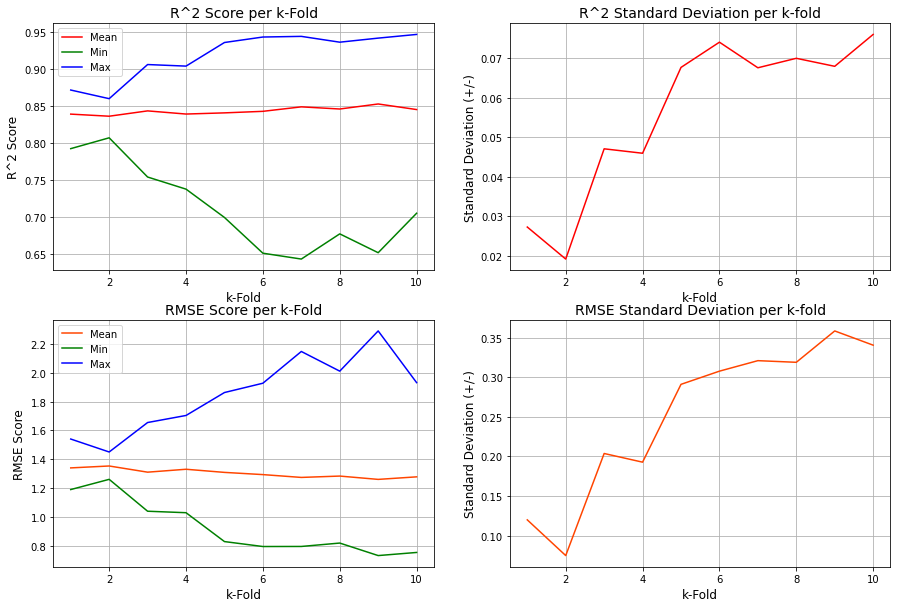

In [60]:
# Apply k-Fold Cross Validation on the training set

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedStratifiedKFold(n_splits = k, n_repeats = 3, random_state = 0)
  r2_scores = cross_val_score(rf_reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(rf_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(rf_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(rf_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">Random Forest Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.845</td>
      <td>1.278</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.076</td>
      <td>0.341</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.705</td>
      <td>0.753</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.947</td>
      <td>1.932</td>
    </tr>
  </tbody>
</table>

In [61]:
# Apply Grid Search for parameter tuning

# param_dict = {'n_estimators': [50, 100, 150, 200, 250],
#               'criterion': ['mse', 'mae'],
#               'max_depth': [1, 5, 10, 25, 50, 75, 100],
#               'min_samples_leaf': [2, 5, 10],
#               'min_samples_split': [2, 5, 10],
#               'random_state': [0, 1, 2, 5, 10]}

param_dict = {'criterion': ['mse'],
              'max_depth': [4],
              'min_samples_split': [2, 3],
              'min_samples_leaf': [3, 4],
              'n_estimators': [52, 53],
              'random_state': [1, 2, 3]}

# grid = GridSearchCV(rf_reg, param_dict, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(rf_reg, param_dict, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(rf_reg, param_dict, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
grid = GridSearchCV(rf_reg, param_dict, scoring='r2', cv=cv, n_jobs=-1)
results = grid.fit(X_train, y_train)

# Summarize results
best_score = grid.best_score_
best_parameters = grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)


Best Score: 84.534%
Best Parameters:  {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 53, 'random_state': 2}


<table border = "1">
  <thead>
    <th colspan = "2">Random Forest Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>84.534%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'mse'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>4</td>
    </tr>
    <tr>
      <td><b>min_samples_split</b></td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>53</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>2</td>
    </tr>
  </tbody>
</table>

### XGBoost (XGB)

In [62]:
xgb_reg = XGBRegressor(max_depth=3, min_child_weight=9, gamma=0.07, subsample=1.0, 
                   colsample_bytree=0.66, reg_alpha=5, n_estimators=44,
                   learning_rate=0.13, random_state=50)
xgb_reg.fit(X_train, y_train)

[14:37:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.66, gamma=0.07,
             importance_type='gain', learning_rate=0.13, max_delta_step=0,
             max_depth=3, min_child_weight=9, missing=None, n_estimators=44,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=50,
             reg_alpha=5, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1.0, verbosity=1)

In [63]:
# Predict test set results
y_pred = xgb_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, y_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, y_pred)))

[[ 5.87  8.  ]
 [14.87 15.  ]
 [16.08 16.  ]
 [10.67 10.  ]
 [ 9.41 10.  ]
 [12.6  12.  ]
 [13.39 13.  ]
 [17.4  17.  ]
 [12.52 12.  ]
 [11.25 12.  ]
 [10.65 11.  ]
 [10.5  10.  ]
 [13.07 13.  ]
 [ 8.71  8.  ]
 [17.4  18.  ]
 [12.75 12.  ]
 [13.34 13.  ]
 [12.9  13.  ]
 [10.44 10.  ]
 [10.76 10.  ]
 [12.57 12.  ]
 [10.66 10.  ]
 [17.4  17.  ]
 [13.26 15.  ]
 [12.88 14.  ]
 [ 3.46  0.  ]
 [12.85 12.  ]
 [13.23 14.  ]
 [11.41 12.  ]
 [12.86  9.  ]
 [13.72 13.  ]
 [16.02 16.  ]
 [12.77 13.  ]
 [15.78 16.  ]
 [12.83 12.  ]
 [ 9.06 10.  ]
 [ 9.65 10.  ]
 [11.05 11.  ]
 [12.68 13.  ]
 [11.04 10.  ]
 [15.54 15.  ]
 [17.27 18.  ]
 [11.49 11.  ]
 [13.22 13.  ]
 [12.72 13.  ]
 [10.15 10.  ]
 [12.95 14.  ]
 [10.21  9.  ]
 [11.17 11.  ]
 [ 9.21 10.  ]
 [ 5.44  8.  ]
 [14.95 17.  ]
 [10.01  9.  ]
 [12.47 13.  ]
 [ 5.73  8.  ]
 [10.66 11.  ]
 [11.55 12.  ]
 [11.15 12.  ]
 [14.43 15.  ]
 [14.58 15.  ]
 [13.3  13.  ]
 [ 7.57  7.  ]
 [11.16 12.  ]
 [ 8.93 10.  ]
 [13.2  12.  ]
 [12.75 12.  ]
 [11.44 11

<table border = "1">
  <thead>
    <th colspan = "2">XGBoost Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.777</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.188</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.090</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.833</td>
    </tr>
  </tbody>
</table>

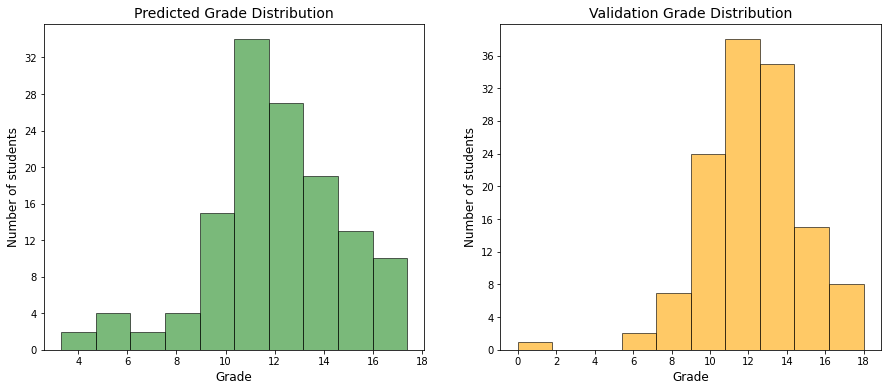

In [64]:
# Plot histogram for y_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 36, 4))
plt.hist(x=y_pred, facecolor='forestgreen', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Predicted Grade Distribution', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 44, 4))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Validation Grade Distribution', fontsize=14)

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 1 --

R^2 Scoring:
Mean: 0.823022
Std: +/- 0.018451
Min: 0.802530
Max: 0.851588

RMSE Scoring:
Mean: 1.408308
Std: +/- 0.080048
Min: 1.279842
Max: 1.502482



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)



-- Fold: 2 --

R^2 Scoring:
Mean: 0.831888
Std: +/- 0.020868
Min: 0.784799
Max: 0.860076

RMSE Scoring:
Mean: 1.371135
Std: +/- 0.074877
Min: 1.260571
Max: 1.532010



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 3 --

R^2 Scoring:
Mean: 0.838512
Std: +/- 0.041247
Min: 0.760209
Max: 0.904207

RMSE Scoring:
Mean: 1.334996
Std: +/- 0.174960
Min: 1.050658
Max: 1.634069



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 4 --

R^2 Scoring:
Mean: 0.835935
Std: +/- 0.039203
Min: 0.750603
Max: 0.899937

RMSE Scoring:
Mean: 1.347819
Std: +/- 0.166270
Min: 1.051356
Max: 1.661287



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 5 --

R^2 Scoring:
Mean: 0.841584
Std: +/- 0.062155
Min: 0.710418
Max: 0.926550

RMSE Scoring:
Mean: 1.310970
Std: +/- 0.268001
Min: 0.888417
Max: 1.828417



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 6 --

R^2 Scoring:
Mean: 0.841844
Std: +/- 0.062562
Min: 0.709634
Max: 0.939566

RMSE Scoring:
Mean: 1.307378
Std: +/- 0.266311
Min: 0.821695
Max: 1.866255



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 7 --

R^2 Scoring:
Mean: 0.847557
Std: +/- 0.056554
Min: 0.692755
Max: 0.929628

RMSE Scoring:
Mean: 1.286645
Std: +/- 0.270695
Min: 0.894236
Max: 1.992881



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 8 --

R^2 Scoring:
Mean: 0.845747
Std: +/- 0.065327
Min: 0.681435
Max: 0.933980

RMSE Scoring:
Mean: 1.285395
Std: +/- 0.284208
Min: 0.898426
Max: 1.998117



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class


-- Fold: 9 --

R^2 Scoring:
Mean: 0.851870
Std: +/- 0.059489
Min: 0.696646
Max: 0.943476

RMSE Scoring:
Mean: 1.270318
Std: +/- 0.327021
Min: 0.722371
Max: 2.137557



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class


-- Fold: 10 --

R^2 Scoring:
Mean: 0.850728
Std: +/- 0.064957
Min: 0.711564
Max: 0.953468

RMSE Scoring:
Mean: 1.263111
Std: +/- 0.300058
Min: 0.705891
Max: 1.930227



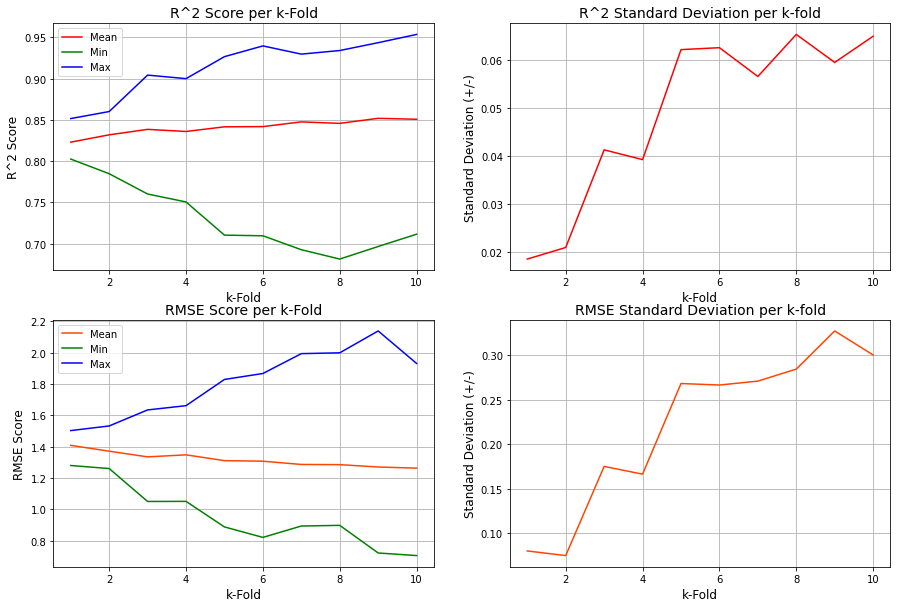

In [65]:
# Apply k-Fold Cross Validation on the training set

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedStratifiedKFold(n_splits = k, n_repeats = 3, random_state = 0)
  r2_scores = cross_val_score(xgb_reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">XGBoost Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.851</td>
      <td>1.263</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.065</td>
      <td>0.300</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.712</td>
      <td>0.706</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.954</td>
      <td>1.930</td>
    </tr>
  </tbody>
</table>

In [66]:
# Apply Grid Search for parameter tuning

# param_dict = {'max_depth': [1, 2, 3, 4, 5, 10, 20, 30], 
#               'learning_rate': [0.05, 0.1, 0.15],
#               'colsample_bytree': [0.3, 0.5, 0.7],
#               'n_estimators': [25, 50, 75, 100, 150, 200],
#               'min_child_weight': [1, 2, 4, 5, 8, 10],
#               'reg_alpha': [0.5, 1, 1.5, 2, 5, 10],
#               'gamma': [0, 0.1, 0.2, 0.3],
#               'subsample': [0.6, 0.8, 1.0],
#               'random_state': [0, 1]}

param_dict = {'max_depth': [3],
              'min_child_weight': [9],
              'gamma': [0.07],
              'subsample': [1],
              'colsample_bytree': [0.66],
              'reg_alpha': [5],
              'learning_rate': [.13],
              'n_estimators': [43, 44, 45],
              'random_state': [49, 50, 51]}

# grid = GridSearchCV(xgb_reg, param_dict, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(xgb_reg, param_dict, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(xgb_reg, param_dict, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
grid = GridSearchCV(xgb_reg, param_dict, scoring='r2', cv=cv, n_jobs=-1)
results = grid.fit(X_train, y_train)

# Summarize results
best_score = grid.best_score_
best_parameters = grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)


[14:37:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score: 85.073%
Best Parameters:  {'colsample_bytree': 0.66, 'gamma': 0.07, 'learning_rate': 0.13, 'max_depth': 3, 'min_child_weight': 9, 'n_estimators': 44, 'random_state': 50, 'reg_alpha': 5, 'subsample': 1}


<table border = "1">
  <thead>
    <th colspan = "2">XGBoost Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>85.073%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>3</td>
    </tr>
    <tr>
      <td><b>min_child_weight</b></td>
      <td>9</td>
    </tr>
    <tr>
      <td><b>gamma</b></td>
      <td>0.07</td>
    </tr>
    <tr>
      <td><b>colsample_bytree</b></td>
      <td>0.66</td>
    </tr>
    <tr>
      <td><b>subsample</b></td>
      <td>1</td>
    </tr>
    <tr>
      <td><b>reg_alpha</b></td>
      <td>5</td>
    </tr>
    <tr>
      <td><b>learning_rate</b></td>
      <td>0.13</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>44</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>50</td>
    </tr>
  </tbody>
</table>

### LightGBM (LGB)

In [67]:
lgb_reg = LGBMRegressor(max_depth=3, n_estimators=32, learning_rate=0.1,
                    num_leaves=7, min_split_gain=2, max_samples=0.01,
                    reg_lambda=2.11, subsample=1, subsample_freq=1,
                    colsample_bytree=0.94, random_state=0)
lgb_reg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.94,
              importance_type='split', learning_rate=0.1, max_depth=3,
              max_samples=0.01, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=2, n_estimators=32, n_jobs=-1, num_leaves=7,
              objective=None, random_state=0, reg_alpha=0.0, reg_lambda=2.11,
              silent=True, subsample=1, subsample_for_bin=200000,
              subsample_freq=1)

In [68]:
# Predict test set results
y_pred = lgb_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, y_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, y_pred)))

[[ 6.43  8.  ]
 [14.79 15.  ]
 [15.92 16.  ]
 [10.71 10.  ]
 [ 9.47 10.  ]
 [12.8  12.  ]
 [13.3  13.  ]
 [17.34 17.  ]
 [12.44 12.  ]
 [11.46 12.  ]
 [10.87 11.  ]
 [10.55 10.  ]
 [13.06 13.  ]
 [ 8.76  8.  ]
 [17.34 18.  ]
 [12.69 12.  ]
 [13.1  13.  ]
 [12.89 13.  ]
 [10.73 10.  ]
 [10.64 10.  ]
 [12.8  12.  ]
 [10.61 10.  ]
 [17.34 17.  ]
 [13.19 15.  ]
 [12.61 14.  ]
 [ 3.89  0.  ]
 [12.77 12.  ]
 [13.27 14.  ]
 [11.21 12.  ]
 [12.67  9.  ]
 [13.4  13.  ]
 [16.17 16.  ]
 [12.77 13.  ]
 [15.78 16.  ]
 [12.82 12.  ]
 [ 8.97 10.  ]
 [ 9.42 10.  ]
 [11.1  11.  ]
 [12.73 13.  ]
 [10.6  10.  ]
 [15.46 15.  ]
 [17.25 18.  ]
 [11.21 11.  ]
 [13.17 13.  ]
 [12.61 13.  ]
 [10.03 10.  ]
 [12.77 14.  ]
 [10.07  9.  ]
 [11.18 11.  ]
 [ 9.46 10.  ]
 [ 6.39  8.  ]
 [14.86 17.  ]
 [10.04  9.  ]
 [12.44 13.  ]
 [ 6.49  8.  ]
 [10.57 11.  ]
 [11.46 12.  ]
 [11.05 12.  ]
 [14.42 15.  ]
 [14.6  15.  ]
 [13.05 13.  ]
 [ 8.67  7.  ]
 [11.2  12.  ]
 [ 8.97 10.  ]
 [13.04 12.  ]
 [12.8  12.  ]
 [11.35 11

<table border = "1">
  <thead>
    <th colspan = "2"> LightGBM Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.774</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.136</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.066</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.840</td>
    </tr>
  </tbody>
</table>

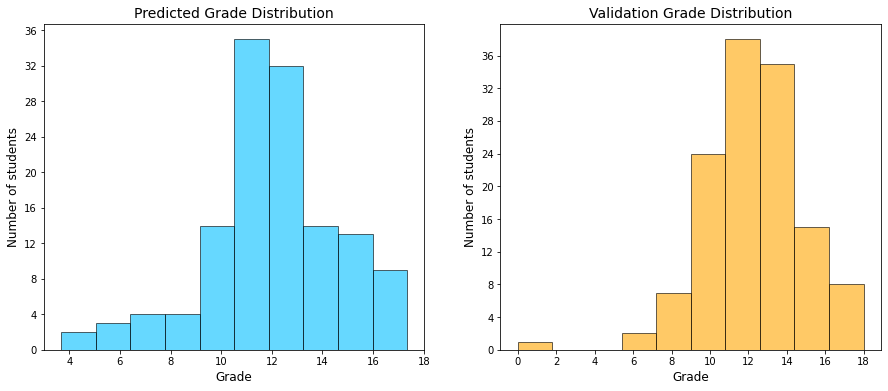

In [69]:
# Plot histogram for y_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 40, 4))
plt.hist(x=y_pred, facecolor='deepskyblue', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Predicted Grade Distribution', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 40, 4))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Validation Grade Distribution', fontsize=14)

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 1 --

R^2 Scoring:
Mean: 0.799129
Std: +/- 0.012889
Min: 0.782335
Max: 0.821879

RMSE Scoring:
Mean: 1.501592
Std: +/- 0.056456
Min: 1.402098
Max: 1.577441


-- Fold: 2 --

R^2 Scoring:
Mean: 0.813106
Std: +/- 0.029405
Min: 0.740032
Max: 0.849207

RMSE Scoring:
Mean: 1.444220
Std: +/- 0.100733
Min: 1.308615
Max: 1.683836



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 3 --

R^2 Scoring:
Mean: 0.820453
Std: +/- 0.034215
Min: 0.755152
Max: 0.862957

RMSE Scoring:
Mean: 1.411753
Std: +/- 0.129858
Min: 1.265633
Max: 1.651210



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 4 --

R^2 Scoring:
Mean: 0.827598
Std: +/- 0.040543
Min: 0.768930
Max: 0.892324

RMSE Scoring:
Mean: 1.382683
Std: +/- 0.181202
Min: 1.104154
Max: 1.683605



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)



-- Fold: 5 --

R^2 Scoring:
Mean: 0.835918
Std: +/- 0.059861
Min: 0.705564
Max: 0.914401

RMSE Scoring:
Mean: 1.338916
Std: +/- 0.254331
Min: 0.937556
Max: 1.843679



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 6 --

R^2 Scoring:
Mean: 0.834057
Std: +/- 0.059066
Min: 0.687953
Max: 0.900869

RMSE Scoring:
Mean: 1.346004
Std: +/- 0.245620
Min: 1.027261
Max: 1.934676



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 7 --

R^2 Scoring:
Mean: 0.839432
Std: +/- 0.050618
Min: 0.732724
Max: 0.906510

RMSE Scoring:
Mean: 1.325730
Std: +/- 0.243199
Min: 1.061212
Max: 1.857055



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 8 --

R^2 Scoring:
Mean: 0.837616
Std: +/- 0.053452
Min: 0.717966
Max: 0.903137

RMSE Scoring:
Mean: 1.330107
Std: +/- 0.235899
Min: 1.006776
Max: 1.816621



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class


-- Fold: 9 --

R^2 Scoring:
Mean: 0.845247
Std: +/- 0.058930
Min: 0.685376
Max: 0.924468

RMSE Scoring:
Mean: 1.302810
Std: +/- 0.325674
Min: 0.835049
Max: 2.176904



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class


-- Fold: 10 --

R^2 Scoring:
Mean: 0.840751
Std: +/- 0.070635
Min: 0.706313
Max: 0.927524

RMSE Scoring:
Mean: 1.305771
Std: +/- 0.309670
Min: 0.880961
Max: 1.833297



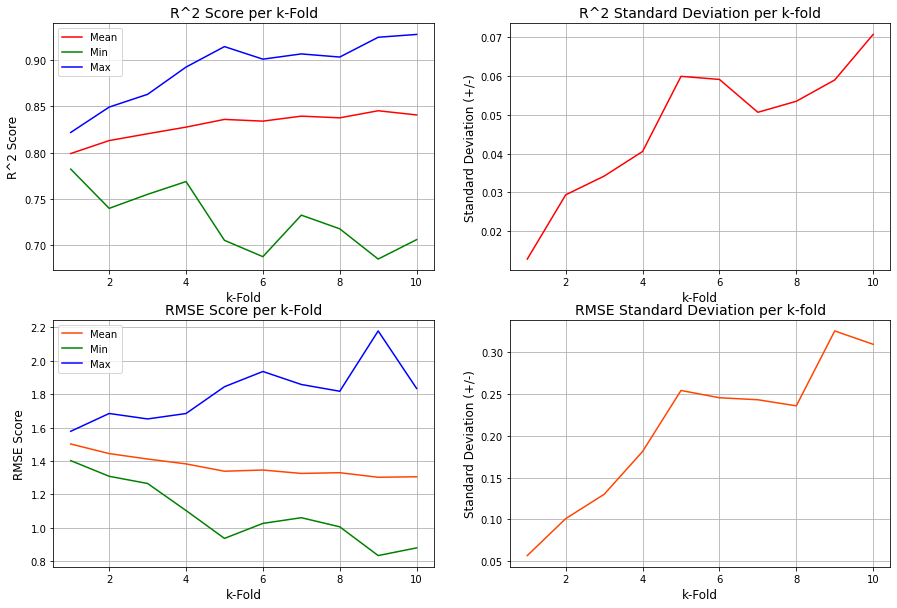

In [70]:
# Apply k-Fold Cross Validation on the training set

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedStratifiedKFold(n_splits = k, n_repeats = 3, random_state = 0)
  r2_scores = cross_val_score(lgb_reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(lgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(lgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(lgb_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">LightGBM Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.841</td>
      <td>1.306</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.071</td>
      <td>0.310</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.707</td>
      <td>0.881</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.928</td>
      <td>1.830</td>
    </tr>
  </tbody>
</table>

In [71]:
# Apply Grid Search for parameter tuning

# param_dict = {'boosting_type': ['gbst'],
#               'max_depth': [10, 25, 50, 75, 100],
#               'n_estimators': [50, 100, 150, 200, 250],
#               'learning_rate': [0.01, 0.05, 0.1, 0.15],
#               'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1],
#               'num_leaves': [1, 5, 10, 20],
#               'min_split_gain': [2, 5, 10],
#               'max_samples': [0.2, 0.4, 0.6, 0.8, 1],
#               'reg_alpha': [0.5, 1, 1.5, 2, 5, 10],
#               'reg_lambda': [0.5, 1, 1.5, 2, 5, 10],
#               'subsample': [1, 1.5, 2, 5, 10],
#               'subsample_freq': [5, 10, 15, 20, 25],
#               'random_state': [0, 1, 2, 5, 10, 20, 40]}

param_dict = {'boosting_type': ['gbdt'],
              'max_depth': [3],
              'n_estimators': [32],
              'colsample_bytree': [0.94],
              'learning_rate': [0.1],
              'num_leaves': [7],
              'min_split_gain': [2],
              'max_samples': [0.01],
              'reg_lambda': [2.11],
              'subsample': [1],
              'subsample_freq': [1],
              'random_state': [0]}

# grid = GridSearchCV(lgb_reg, param_dict, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(lgb_reg, param_dict, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(lgb_reg, param_dict, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
grid = GridSearchCV(lgb_reg, param_dict, scoring='r2', cv=cv, n_jobs=-1)
results = grid.fit(X_train, y_train)

# Summarize results
best_score = grid.best_score_
best_parameters = grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)


Best Score: 84.075%
Best Parameters:  {'boosting_type': 'gbdt', 'colsample_bytree': 0.94, 'learning_rate': 0.1, 'max_depth': 3, 'max_samples': 0.01, 'min_split_gain': 2, 'n_estimators': 32, 'num_leaves': 7, 'random_state': 0, 'reg_lambda': 2.11, 'subsample': 1, 'subsample_freq': 1}


<table border = "1">
  <thead>
    <th colspan = "2">LightGBM Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>84.075%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>3</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>32</td>
    </tr>
    <tr>
      <td><b>learning_rate</b></td>
      <td>0.1</td>
    </tr>
    <tr>
      <td><b>colsample_bytree</b></td>
      <td>0.94</td>
    </tr>
    <tr>
      <td><b>num_leaves</b></td>
      <td>7</td>
    </tr>
    <tr>
      <td><b>min_split_gain</b></td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>max_samples</b></td>
      <td>0.01</td>
    </tr>
    <tr>
      <td><b>reg_lambda</b></td>
      <td>2.11</td>
    </tr>
    <tr>
      <td><b>subsample</b></td>
      <td>1</td>
    </tr>
    <tr>
      <td><b>subsample_freq</b></td>
      <td>1</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

## 6. Final Results

<table border = "1">
  <thead>
    <th colspan = "5">Final Regression Scores - Portuguese </th>
  </thead>
  <tbody>
    <tr>
      <td><b>Model</b></td>
      <td colspan = "2"><b>R^2</b></td>
      <td colspan = "2"><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b></b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
    </tr>
    <tr>
      <td><b>Linear Regression (LR)</b></td>
      <td>0.834</td>
      <td>0.818</td>
      <td>1.334</td>
      <td>1.136</td>
    </tr>
    <tr>
      <td><b>Decision Tree (DT)</b></td>
      <td>0.842</td>
      <td>0.833</td>
      <td>1.275</td>
      <td>1.088</td>
    </tr>
    <tr>
      <td><b>Random Forest (RF)</b></td>
      <td>0.845</td>
      <td>0.843</td>
      <td>1.278</td>
      <td>1.056</td>
    </tr>
    <tr>
      <td><b>XGBoost (XGB)</b></td>
      <td>0.851</td>
      <td>0.833</td>
      <td>1.263</td>
      <td>1.090</td>
    </tr>
    <tr>
      <td><b>LightGBM (LGB)</b></td>
      <td>0.841</td>
      <td>0.840</td>
      <td>1.306</td>
      <td>1.066</td>
    </tr>
  </tbody>
</table>